In [528]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import pickle
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [529]:
train_filename='train.csv'
test_filename='test.csv'
train_news=pd.read_csv(train_filename)
test_news=pd.read_csv(test_filename)

In [530]:
train_news.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [531]:
test_news.head()

,Statement,Label
0,Building a wall on the U.S.-Mexico border will...,True
1,Wisconsin is on pace to double the number of l...,False
2,Says John McCain has done nothing to help the ...,False
3,Suzanne Bonamici supports a plan that will cut...,True
4,When asked by a reporter whether hes at the ce...,False


In [532]:
def distribution(df):
    return sns.countplot(x='Label',data=df,palette='hls')

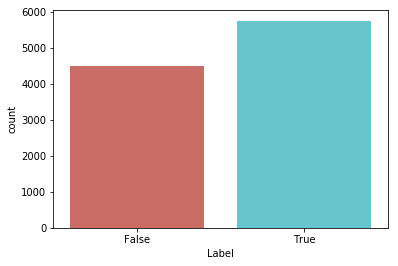

In [533]:
distribution(train_news)

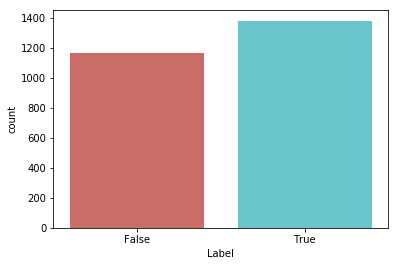

In [534]:
distribution(test_news)

In [535]:
train_news.isnull().sum() 

Statement    0
Label        0
dtype: int64

In [536]:
test_news.isnull().sum()

Statement    0
Label        0
dtype: int64

In [537]:
X,y=train_news['Statement'].values,train_news['Label'].values

In [538]:
X

array([ 'Says the Annies List political group supports third-trimester abortions on demand.',
       'When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
       'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
       ...,
       'Says an alternative to Social Security that operates in Galveston County, Texas, has meant that participants will retire with a whole lot more money than under Social Security.',
       'On lifting the U.S. Cuban embargo and allowing travel to Cuba.',
       "The Department of Veterans Affairs has a manual out there telling our veterans stuff like, 'Are you really of value to your community?' You know, encouraging them to commit suicide."], dtype=object)

In [539]:
with open('X.pickle','wb') as f:
    pickle.dump(X,f)

In [540]:
with open('y.pickle','wb') as f:
    pickle.dump(y,f)

In [541]:
corpus=[]
for i in range(0,len(X)):
    Statement=re.sub(r'\W',' ',str(X[i]))
    Statement=Statement.lower()
    Statement=re.sub(r'\s+[a-z]\s+',' ',Statement)
    Statement=re.sub(r'^[a-z]\s+',' ',Statement)
    Statement=re.sub(r'\s+',' ',Statement)
    Statement=re.sub(r'$[a-z]\s+',' ',Statement)
    corpus.append(Statement)                    

In [542]:
#corpus=str(corpus)
#words=nltk.word_tokenize(corpus)
#tagged_words=nltk.pos_tag(words)
#NamedEntity=nltk.ne_chunk(tagged_words)
#NamedEntity.draw()

In [543]:
vectorizer=CountVectorizer(max_features=2000,min_df=3,max_df=0.6,stop_words=stopwords.words('english'))
X=vectorizer.fit_transform(corpus).toarray()
print(vectorizer.vocabulary_)


{'says': 1616, 'list': 1089, 'political': 1385, 'group': 838, 'supports': 1767, 'third': 1822, 'abortions': 100, 'demand': 542, 'coal': 411, 'start': 1730, 'started': 1731, 'natural': 1224, 'gas': 790, 'took': 1841, 'begin': 256, 'president': 1410, 'george': 797, 'bushs': 317, 'administration': 124, 'hillary': 883, 'clinton': 405, 'john': 1002, 'mccain': 1147, 'voting': 1916, 'give': 805, 'bush': 316, 'benefit': 261, 'iran': 976, 'health': 868, 'care': 342, 'reform': 1508, 'legislation': 1067, 'likely': 1084, 'mandate': 1125, 'free': 774, 'sex': 1659, 'change': 369, 'economic': 609, 'end': 644, 'term': 1801, 'chicago': 378, 'starting': 1732, 'last': 1045, '10': 1, 'years': 1991, 'total': 1843, 'number': 1256, 'fired': 740, 'two': 1877, 'decades': 529, 'jim': 998, 'district': 570, 'person': 1359, 'stage': 1723, 'worked': 1974, 'year': 1990, 'passing': 1326, 'along': 165, 'russ': 1590, 'feingold': 717, 'ethics': 666, 'since': 1684, '19': 14, 'million': 1181, 'oregon': 1292, 'funds': 783,

In [544]:
print(vectorizer.get_feature_names())

['000', '10', '100', '11', '12', '120', '13', '14', '15', '150', '16', '160', '17', '18', '19', '1970s', '1994', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '21', '22', '23', '24', '25', '250', '26', '27', '28', '29', '30', '300', '32', '33', '34', '35', '350', '36', '37', '38', '40', '400', '41', '42', '43', '44', '45', '47', '48', '49', '50', '500', '51', '53', '55', '56', '57', '58', '60', '600', '61', '65', '67', '70', '700', '71', '75', '77', '80', '800', '82', '85', '86', '90', '900', '92', '95', '97', '98', '99', 'abbott', 'ability', 'able', 'abortion', 'abortions', 'absolutely', 'abuse', 'accepted', 'access', 'accidents', 'according', 'account', 'accountability', 'accounts', 'accused', 'across', 'act', 'action', 'actions', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'additional', 'address', 'adjusted', 'administration', 'admits', 'adopted', 'ads', 'adults', 'adva

In [545]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [546]:
tfvectorizer=TfidfVectorizer(max_features=2000,min_df=3,max_df=0.6,stop_words=stopwords.words('english'))
X=tfvectorizer.fit_transform(corpus).toarray()

In [547]:
tfvectorizer.get_feature_names()[:10]

['000', '10', '100', '11', '12', '120', '13', '14', '15', '150']

In [548]:
tfvectorizer.vocabulary_

{'says': 1616,
 'list': 1089,
 'political': 1385,
 'group': 838,
 'supports': 1767,
 'third': 1822,
 'abortions': 100,
 'demand': 542,
 'coal': 411,
 'start': 1730,
 'started': 1731,
 'natural': 1224,
 'gas': 790,
 'took': 1841,
 'begin': 256,
 'president': 1410,
 'george': 797,
 'bushs': 317,
 'administration': 124,
 'hillary': 883,
 'clinton': 405,
 'john': 1002,
 'mccain': 1147,
 'voting': 1916,
 'give': 805,
 'bush': 316,
 'benefit': 261,
 'iran': 976,
 'health': 868,
 'care': 342,
 'reform': 1508,
 'legislation': 1067,
 'likely': 1084,
 'mandate': 1125,
 'free': 774,
 'sex': 1659,
 'change': 369,
 'economic': 609,
 'end': 644,
 'term': 1801,
 'chicago': 378,
 'starting': 1732,
 'last': 1045,
 '10': 1,
 'years': 1991,
 'total': 1843,
 'number': 1256,
 'fired': 740,
 'two': 1877,
 'decades': 529,
 'jim': 998,
 'district': 570,
 'person': 1359,
 'stage': 1723,
 'worked': 1974,
 'year': 1990,
 'passing': 1326,
 'along': 165,
 'russ': 1590,
 'feingold': 717,
 'ethics': 666,
 'since': 1

In [549]:
X.shape

(10240, 2000)

In [550]:
X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [551]:
text_train,text_test,sent_train,sent_text=train_test_split(X,y,test_size=0.2,random_state=0)
clf=LogisticRegression()
clf.fit(text_train,sent_train)
sent_pred=clf.predict(text_test) 

In [552]:
cm=confusion_matrix(sent_text,sent_pred)
cm

array([[379, 543],
       [284, 842]], dtype=int64)

In [553]:
from sklearn.metrics import accuracy_score
print(accuracy_score(sent_text,sent_pred))

0.59619140625


In [564]:
parameters = {
               'rf__max_depth': np.arange(1,10)
}

In [565]:
random_forest_ngram = Pipeline([
        ('rf',RandomForestClassifier(n_estimators=300,n_jobs=-1))
        ])

In [566]:
gs_clf = GridSearchCV(random_forest_ngram,param_grid= parameters, n_jobs=-1)
gs_clf = gs_clf.fit(text_train,sent_train)


In [567]:
gs_clf.predict(text_test)
gs_clf.best_score_

0.5723876953125

In [569]:
gs_clf.best_params_


{'rf__max_depth': 9}